# Sentiment Analysis from twitter

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import snscrape.modules.twitter as sntwitter
import nltk
import warnings
warnings.filterwarnings('ignore')
# nltk.download('vader_lexicon') #required for Sentiment Analysis

In [10]:
#Get user input
query = input("Query: ")

#As long as the query is valid (not empty or equal to '#')...
if query != '':
    noOfTweet = input("Enter the number of tweets you want to Analyze: ")
    if noOfTweet != '' :
        noOfDays = input("Enter the number of days you want to Scrape Twitter for: ")
        if noOfDays != '':
                #Creating list to append tweet data
                tweets_list = []
                now = dt.date.today()
                now = now.strftime('%Y-%m-%d')
                yesterday = dt.date.today() - dt.timedelta(days = int(noOfDays))
                yesterday = yesterday.strftime('%Y-%m-%d')
                for i,tweet in enumerate(sntwitter.TwitterSearchScraper(query + ' lang:en since:' +  yesterday + ' until:' + now + ' -filter:links -filter:replies').get_items()):
                    if i > int(noOfTweet):
                        break
                    tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username])

                #Creating a dataframe from the tweets list above 
                df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

                print(df)

Query: nifty
Enter the number of tweets you want to Analyze: 200
Enter the number of days you want to Scrape Twitter for: 4
                     Datetime             Tweet Id  \
0   2022-10-30 23:58:08+00:00  1586870097221586944   
1   2022-10-30 23:52:44+00:00  1586868738263076864   
2   2022-10-30 23:20:40+00:00  1586860667407159298   
3   2022-10-30 23:18:45+00:00  1586860187884953602   
4   2022-10-30 23:14:48+00:00  1586859193469992961   
..                        ...                  ...   
196 2022-10-30 14:14:33+00:00  1586723233276956674   
197 2022-10-30 14:05:17+00:00  1586720899729952771   
198 2022-10-30 14:01:30+00:00  1586719950147768320   
199 2022-10-30 14:00:14+00:00  1586719629891620864   
200 2022-10-30 14:00:02+00:00  1586719579593932801   

                                                  Text       Username  
0    We are in a bearMarket $SPY $SPX $ES_F#stockma...    lamz__bab8a  
1    Also how’s the liquidation of bears going 😁All...  Jones68977468  
2        Pu

In [11]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

#applying this function to Text column of our dataframe
df["Text"] = df["Text"].apply(cleanTxt)

In [12]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
tweet_list1 = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for tweet in df['Text']:
    tweet_list1.append(tweet)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(tweet) #appending the tweet that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(tweet) #appending the tweet that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(tweet) #appending the tweet that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(df)) #percentage is the function defined above
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))


In [13]:
#Converting lists to pandas dataframe
tweet_list1 = pd.DataFrame(tweet_list1)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Since " + noOfDays + " days, there have been", len(tweet_list1) ,  "tweets on " + query, end='\n*')
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n*')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n*')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n*')


Since 4 days, there have been 201 tweets on nifty
*Positive Sentiment: 159.00
*Neutral Sentiment: 19.00
*Negative Sentiment: 23.00
*

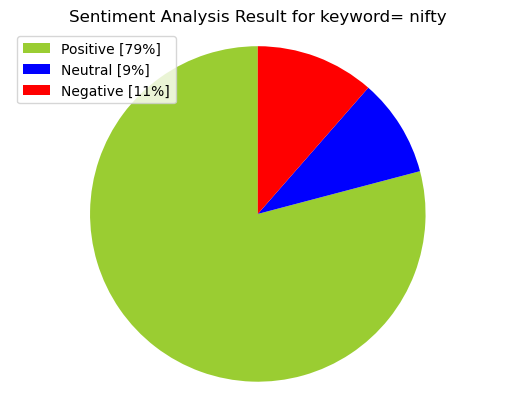

In [14]:
#Creating PieCart**

labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+query+"" )
plt.axis('equal')
plt.show()


Wordcloud for nifty


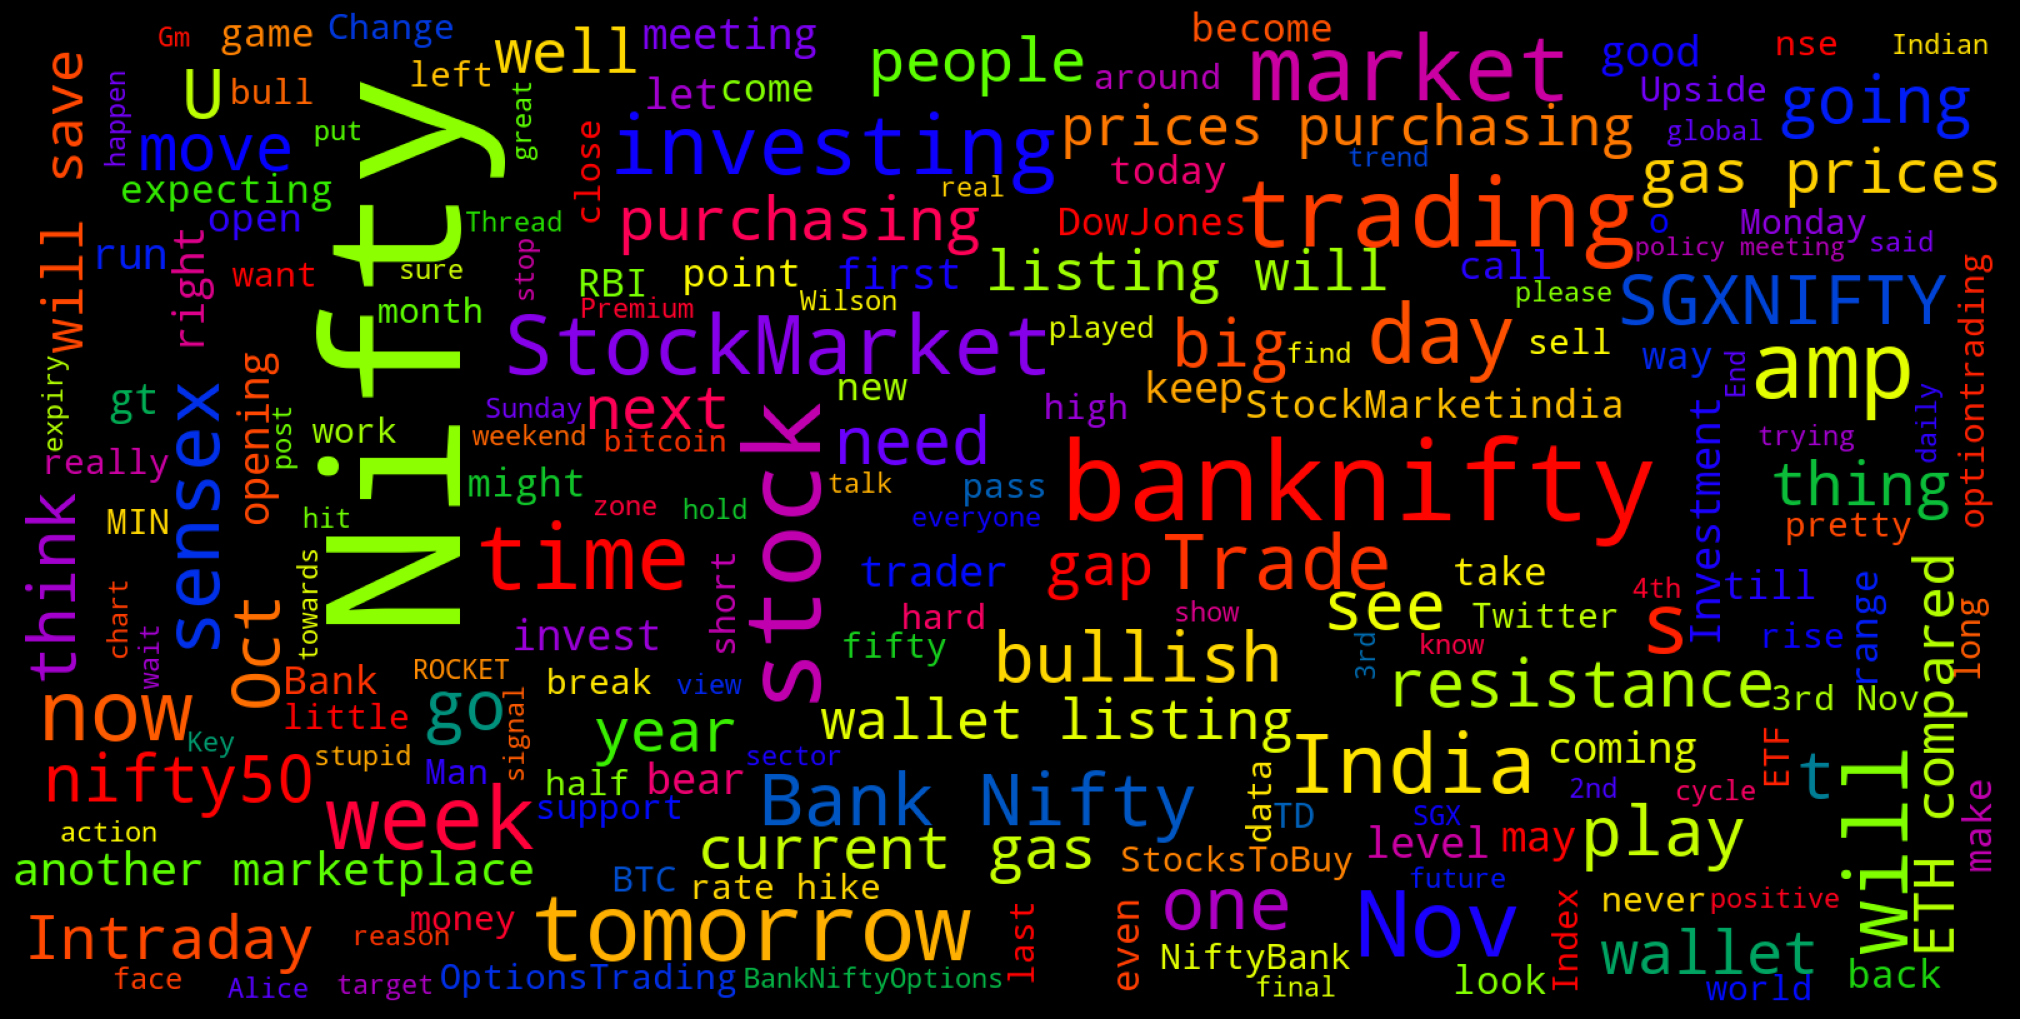

In [15]:
# word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([twts for twts in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + query)
word_cloud(df['Text'].values)
